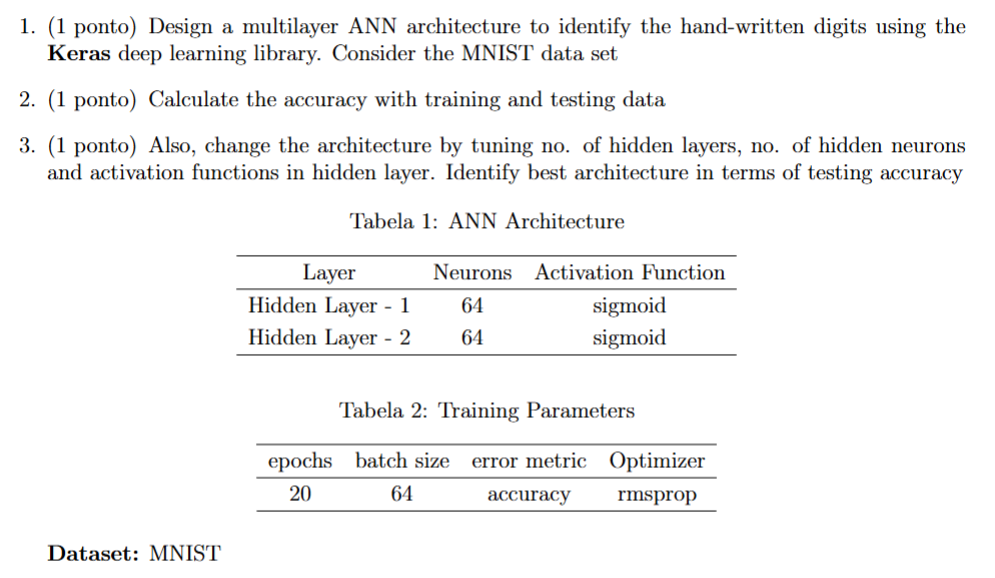

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def mnist_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    return model

model = mnist_model()
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

model.save("mnist_model.h5")

loaded_model = tf.keras.models.load_model("mnist_model.h5")
new_data = tf.random.uniform((1, 28, 28))
predicted_result = loaded_model.predict(new_data)
print("Predicted Digit:", tf.argmax(predicted_result, axis=1).numpy()[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7030 - loss: 1.2054 - val_accuracy: 0.9168 - val_loss: 0.2922
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9211 - loss: 0.2716 - val_accuracy: 0.9391 - val_loss: 0.2111
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9415 - loss: 0.1964 - val_accuracy: 0.9505 - val_loss: 0.1673
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9528 - loss: 0.1562 - val_accuracy: 0.9545 - val_loss: 0.1462
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9613 - loss: 0.1289 - val_accuracy: 0.9613 - val_loss: 0.1299
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9671 - loss: 0.1109 - val_accuracy: 0.9645 - val_loss: 0.1155
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9708 - loss: 0.0990 - val_accuracy: 0.9676 - val_loss: 0.1082
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9753 - loss: 0.0829 - val_accuracy: 0.

Train Accuracy: 0.9930999875068665
Test Accuracy: 0.9750000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Digit: 8
